<a href="https://www.kaggle.com/code/sanjiv856/titanic-machine-learning-with-scikitlearn-pipeline?scriptVersionId=193795944" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Here is my understanding of the process of machine learning of the Titanic data using scikit-learn pipeline. The aim of the notebook is not to get the best score, but to understand the process. I hope it helps others. 

Please feel free to fork or customize this notebook to suit your needs. If you found it helpful, **please consider upvoting**. Special thanks to the amazing Kagglers whose work inspired this notebook!

Connect with me on:
- [LinkedIn](https://www.linkedin.com/in/sanjiv-kumar-ph-d-b246b44a/) <a href="https://www.linkedin.com/in/sanjiv-kumar-ph-d-b246b44a/"><img src="https://img.icons8.com/color/48/000000/linkedin.png" alt="LinkedIn" width="30"></a>
- [GitHub](https://github.com/sanjiv856/) <a href="https://github.com/sanjiv856/"><img src="https://img.icons8.com/ios-filled/50/000000/github.png" alt="GitHub" width="30"></a>

<style>
body {
text-align: justify}
</style>

# Loading libraries 

Loading libraries. 

- Numpy and Pandas for data processing
- Matplotlib and Seaborn for plotting 
- Sklearn for machine learning 
- Joblib for saving and loading the models 

Note: `IterativeImputer` is still in experimental phase and therefore requires`from sklearn.experimental import enable_iterative_imputer` to load.

In [1]:
# Loading libraries 

import os
import shutil 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Loading and examining the dataset

`pd.read_csv()` is used to read the data. One can use `train_df.head()`, `train_df.tail()` or `train_df.sample(5)` to have a look at some of the rows. `train_df.sample(5)` randomly select five rows from the DataFrame.

To reiterate: 
- `train_df.head()` # to see top 5 rows
- `train_df.tail()` # to see bottom 5 rows
- `train_df.sample(5)` # to see random 5 rows

In [2]:
# Loading and examining the dataset
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

train_df.sample(5)
# test_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
594,595,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
358,359,1,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S


`train_df.describe()` gives an overview of some of the stasticial values for the numeric columns. Try `train_df.describe(include = 'all')` to see the values for all columns and `train_df.describe(include=['O'])` to see descriptive statistics for categorical columns. 

To reiterate: 
- `train_df.describe()` # descriptive statistics for numerical columns
- `train_df.describe(include = 'all')` # descriptive statistics for all columns
- `train_df.describe(include = ['O']` # descriptive statistics for categorical columns

In [3]:
train_df.describe()
# train_df.describe(include = 'all')
# train_df.describe(include=['O'])
# test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`train_df.info()` gives the non-null count and data types of all the columns. It is important for examining the missing values and data types of columns, which will be important in selecting columns for preprocessing. 

In [4]:
train_df.info()
# test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`train_df.isna()` checks if the value is present or missing from the data. This is combined with `train_df.isna().sum()` to add all the missing values along each columns to get the missing values for that column. This can further be used with `train_df.isna().sum().sort_values(ascending = False)` to arrange the columns with most missing values on the top. `train_df.shape` is used to check the number of rows and column in the DataFrame. There is some conversation on using `isna()` or `isnull()`, both of which are identical. Read more [HERE](https://stackoverflow.com/questions/52086574/pandas-isna-and-isnull-what-is-the-difference).

To reiterate: 
- `train_df.isna()` # to check missing values in the DataFrame
- `train_df.isna().sum()` # to count total number of missing values in each column
- `isna()` and `isnull()` is identical
- `train_df.isna().sum().sort_values(ascending = False)` # to sort based on the missing values
- `train_df.shape` # to check the number of rows and columns in the DataFrame

In [5]:
# train_df.isna().sum().sort_values(ascending = False)
# train_df.shape
test_df.isna().sum().sort_values(ascending = False)
# test_df.shape

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Looking at the missing values, we see that in the `train_df` data there is Cabin with 687 missing values, Age with 177 and Embarked with 2 missing values. Similarly, in the `test_df`, there is Cabin with 327 missing values, Age with 86 and Fare with one missing values. Most of the machine learning algorithms through errors with the missing values,though there are some which can work even with missing values. There are several ways to take care of missing values. Here are some information on how to handle missing values, [A survey on missing data in machine learning](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00516-9) and [Handling missing values in dataset](https://medium.com/@pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62). Missing values can be handled at pre-processing step or can be imputed (filling-in the missing values) in the pipeline. 

# Feature Engineering

Feature Engineering is the process to enhance the dataset by creating new features that may improve model performance. Though it is not a comprehensive list of feature engineering for the Titanic data, we are adding some of the features to the DataFrame. Here we are focusing on the following:

- **Family_Size**: Combines `SibSp` (siblings/spouses aboard) and `Parch` (parents/children aboard) columns to get the total family size, plus 1 (for the individual).
- **Is_Alone**: A binary feature indicating if the passenger was alone. With `np.where` it finds the value of the `Family_Size` where the value is one and assigns it `1` else `0`, to indicate if the individual is traveling alone or not. 
- **Title**: Extracted from the passenger's `Name` to capture the social status. Here `lambda expression` is used to fetch the title from the `Name` column, wherein, the name is split using `,`, second value `[1]` is again split using `.` and first value of that `[0]` is stored into the `Title`. Here is a brief introduction on `lambda` functions in python [How the Python Lambda Function Works – Explained with Examples](https://www.freecodecamp.org/news/python-lambda-function-explained/). 
- **Name_Length**: Length of a name is calculated using `len`, which is applied to the column `Name` using `apply`. It is believed that members of the novel families tend to have longer name and thus might correlate with the survival.
- **Ticket_Number**: Extracts numeric parts of the ticket for potential correlation with survival. Here `Ticket` column is split using space and last value `[-1]` is checked, if it is a digit then it is kept as is, otherwise `NaN` is added to the column. Data type of the column was converted to float (purpose of which is not clear to me). 
- **Ticket_Number_Counts**: Here `groupby` function is used to group the data by the `Ticket` column. Then, it applies the `transform` function with the `count` aggregation to count the number of occurrences of each ticket number in the dataset. The result is a new column with the count of each ticket number, which may be useful for understanding the frequency of ticket numbers.
- **Ticket_Location**: Here again lambda function is applied to the `Ticket` column and is split with a space, while taking the first value `[0]`, lambda expression returns the value itself if the length of this vaule is more then 1, else it returns `Blank`. This is followed by replacing similar tickets together using the dictionary `ticket_location_mapping`, which indicates what values to map to. This is followed by the actual replacement using `replace`. This is from the YouTube tutorial [Beginner Data Science Portfolio Project Walkthrough (Kaggle Titanic)](https://www.youtube.com/watch?v=6IGx7ZZdS74&t=4s&pp=ygUPUnlhbiBOb2xhbiBEYXRh)
- **Cabin_Alphabet**: Here we record the cabin alphabet which might be of some significance. Lambda function is applied and alphabet of the cabin is returned, if it is not present, `Missing` is added. 
- **Cabin_Recorded**: Features based on the cabin (e.g., whether cabin info is recorded). Here we record if the cabin alphabet is known or not for each row. It returns `1` if it the information is present, else `0` if it is missing. 
- **Age_Group**: Categorizes age into groups/bins and labelled as `'Child', 'Teenager', 'Adult', 'Middle_Aged', 'Senior'`, as per the values.

We will be using Pandas for some of the feature engineering. Here is one nice FREE tutorial from [Data School](https://courses.dataschool.io/pandas-in-30-days) which I found very helpful. The whole thing is wrapped in a custom function `feature_engineering`. 


In [6]:
# Feature Engineering
def feature_engineering(df):
    df = df.copy()
    
    # Family Size
    df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
    
    # Is Alone
    df['Is_Alone'] = np.where(df['Family_Size'] == 1, 1, 0)
    
    # Extract Title from Name
    df['Title'] = df['Name'].apply(lambda name: name.split(",")[1].split(".")[0].strip())
    
    # Name Length
    df['Name_Length'] = df['Name'].apply(len)
    
    # Ticket Number
    df['Ticket_Number'] = df['Ticket'].apply(lambda x: x.split(' ')[-1] if x.split(' ')[-1].isdigit() else np.nan).astype(float)
    
    # Ticket Number Counts
    df['Ticket_Number_Counts'] = df.groupby('Ticket')['Ticket'].transform('count')
    
    # Ticket Location
    df['Ticket_Location'] = df['Ticket'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 1 else 'Blank')
    ticket_location_mapping = {
        'SOTON/O.Q.':'SOTON/OQ', 'C.A.':'CA', 'CA.':'CA',
        'SC/PARIS':'SC/Paris', 'S.C./PARIS':'SC/Paris',
        'A/4.':'A/4', 'A/5.':'A/5', 'A.5.':'A/5',
        'A./5.':'A/5', 'W./C.':'W/C', 'S.W./PP':'SW/PP'  
    }
    df['Ticket_Location'] = df['Ticket_Location'].replace(ticket_location_mapping)
    
    # Cabin Information
    df['Cabin_Alphabet'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Missing')
    df['Cabin_Recorded'] = np.where(df['Cabin'].notna(), 1, 0)
    
    # Age Group Binning
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], 
                             labels=['Child', 'Teenager', 'Adult', 'Middle_Aged', 'Senior'])
    
    return df

Applying the feature engineering to both `train_df` and `test_df`.

In [7]:
# Apply feature engineering
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)

Defining features and targets. `features_to_drop` enlists the columns that will not be used for the machine learning. The list is passed to `drop` and assigned to a new variable. `X` is the feature DataFrame to be used for training, `y` is the target for this DataFrame. `X_test` is the test DataFrame to predict the values for the `Survived` column.

In [8]:
# Define features and target
features_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived']
X = train_df.drop(features_to_drop, axis=1)
y = train_df['Survived']
X_test = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Defining Preprocessing Pipeline

- **Identifying the Feature Types**: Columns for `numeric_features`, `categorical_features` and `binary_features` are defined as a list. 
- **Creating the Transformers**: Pipeline is created with the steps for processing.
    - `numeric_features`: For numeric features
        - *Imputation*: Here `IterativeImputer` is used. `SimpleImputer` is a univariate imputer (uses single column), which imputes the missing values based on one single column by calculating mean, median etc. which can be specified with the strategy. `KNNImputer` is a multivariate imputer (uses multiple columns) which imputes the missing values based on other similar rows. KNNImputer uses 5 other similar rows specified by `n_neighbors=5`, which is the default. `IterativeImputer` is a multivariate imputer (uses multiple columns) that estimates each feature from all the others, by default it uses `BayesianRidge()`, but other strategies can be specified. 
        - *Encoding*: No transformation/encoding is performed for the numeric features.         
    - `categorical_ohe`: For categorical features with One-Hot-Encoding 
        - *Imputation*: Here `SimpleImputer` is used with `strategy='most_frequent'`, which imputes with the most frequent value in the data. 
        - *Encoding*: One-hot/dummy encoding is performed using `OneHotEncoder`. Here `handle_unknown='ignore'` one-hot encoded columns for unknowns will be all zeros.    
    - `categorical_ordinal`: For categorical features with ordinal encoding 
        - *Imputation*: Here again `SimpleImputer` is used with `strategy='most_frequent'`, which imputes with the most frequent value in the data. 
        - *Encoding*: Ordinal encoding as an integer array is performed using `OrdinalEncoder`. Here `handle_unknown='use_encoded_value', unknown_value=-1)` when `handle_unknown='use_encoded_value'` the encoded value of unknown categories will be set to the value given for the parameter `unknown_value` so all missing values will be encoded with `-1` in this case. 
    - `binary_features`: For binary features. 
        - *Imputation*: No imputation is performed here.  
        - *Encoding*: Not required, these will be 'passthrough' meaning, not transformation will be performed and columns/features will be passed as is to the machine learning algorithms. 
    
- **Combining the Preprocessors**: Applies transformers to the columns. Here `remainder='drop'` is for the columns that will be dropped and not passed to the machine learning algorithms. 

To reiteratre and see documentation: 
- [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): To sequentially apply a list of transformers to preprocess the data. Pipeline vs [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html): `make_pipeline` is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. `Pipeline` requires a tuple of three elements `('name', transformer, ['list of columns to apply'])`. Whereas, `make_pipeline` requires a tuple of two elements `(transformer, ['list of columns to apply'])`.
- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html): Univariate imputer for imputing values based on mean, media etc.
- [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html): Multivariate imputer for KNN-based imputing, default uses `n_neighbors=5`. 
- [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer): Multivariate imputer, can use several strategies, `BayesianRidge()` is the default.
- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html): For one hot encoding categorical columns/features to numeric array. 
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html): Features are converted to ordinal integers in a single column.
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html): Applies transformers to columns. ColumnTransformer vs [make_column_transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html), both are similar, and as with Pipeline vs make_pipeline, here as well `ColumnTransformer` takes list of tuples with three elements `('name', transformer, ['columns'])`, whereas `make_column_transformer` takes list of tuples with two elements `(transformer, ['columns'])`.


In [9]:
# Numerical features
numeric_features = ['Age', 'Fare', 'Ticket_Number', 'Ticket_Number_Counts', 'Name_Length', 'Family_Size', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(random_state=0))
])

# Categorical features with one-hot-endocing
categorical_ohe_features = ['Sex', 'Embarked', 'Ticket_Location', 'Age_Group']
categorical_ohe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Set sparse_output to False
])

# Categorical features with ordinal encoding 
categorical_ordinal_features = ['Title', 'Cabin_Alphabet', 'Pclass']
categorical_ordianal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Set sparse_output to False
])

# Binary features
binary_features = ['Is_Alone', 'Cabin_Recorded']
binary_transformer = 'passthrough'  # No transformation needed

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('catohe', categorical_ohe, categorical_ohe_features),
        ('catordinal', categorical_ordianal, categorical_ordinal_features),
        ('bin', binary_transformer, binary_features)],
    remainder='drop',
)

# Defining Models and Grid Parameters

**Defining Models** 

`models` defines a dictionary of models to be evaluated. Each key in the dictionary represents a different machine learning model, and the corresponding value is an instance of the respective model class. 

**RandomForest**: corresponds to the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model from the sklearn.ensemble module. It is an ensemble learning method that operates by constructing multiple decision trees at training time and outputting the class that is the mode of the classes of the individual trees.

**ExtraTrees**: corresponds to the [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) model from the sklearn.ensemble module. It is also an ensemble learning method, similar to the RandomForestClassifier, but it uses the extra-trees algorithm instead of the traditional decision trees.

**XGBoost**: corresponds to the [XGBClassifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html) model from the xgboost module. XGBoost stands for eXtreme Gradient Boosting, and it is a popular and powerful machine learning algorithm that uses gradient boosting to optimize decision trees.

**DecisionTree**: corresponds to the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) model from the sklearn.tree module. It constructs a decision tree to make predictions.

**LogisticRegression**: corresponds to the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model from the sklearn.linear_model module. It is a popular machine learning algorithm used for binary classification problems.

**GaussianNB**: corresponds to the [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) model from the sklearn.naive_bayes module. It assumes that the features follow a Gaussian distribution.

**KNN**: corresponds to the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) model from the sklearn.neighbors module. It classifies data points based on their proximity to other data points in the feature space.

**SVC**: corresponds to the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model from the sklearn.svm module. SVC model is a popular machine learning algorithm used for both classification and regression problems. 

Each model is instantiated with specific parameters, such as the random_state parameter, to ensure reproducibility and consistency in the results.

The `n_jobs=-1` (-1 is to use all available processors) parameter is used to specify the number of jobs to run in parallel when training the machine learning models.


In [10]:
models = {
    'RandomForest': RandomForestClassifier(random_state=1),
    'ExtraTrees': ExtraTreesClassifier(random_state=1),
    'XGBoost': XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'), 
    'DecisionTree': DecisionTreeClassifier(),    
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'GaussianNB': GaussianNB(),    
    'KNN': KNeighborsClassifier(n_jobs=-1),
    # 'SVC': SVC(), # its taking a long time to run
}

**Grid Parameters**

The `param_grids` dictionary contains the hyperparameter grids for each machine learning model. Each key in the dictionary corresponds to a model name, and the corresponding value is a dictionary containing the hyperparameters and their possible values.

The hyperparameter grid will be used in the grid search to find the best combination of hyperparameters for each model. The grid search process exhaustively searches through the hyperparameter space to find the best combination of hyperparameters that maximizes the model's performance.

In [11]:
param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__criterion': ['gini', 'entropy']
    },
    'ExtraTrees': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__criterion': ['gini', 'entropy']
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__subsample': [0.8, 1.0],
        'classifier__colsample_bytree': [0.8, 1.0]
    },
    'DecisionTree': {
        'classifier__max_depth': [10, 20, 30], 
        'classifier__min_samples_split': [5, 10, 15],
        'classifier__min_samples_leaf': [1, 2, 4], 
        'classifier__criterion': ['gini', 'entropy']
    },
    'KNN': {
        'classifier__n_neighbors': [5, 10, 15, 20, 25], 
        'classifier__p': [1, 2], 
        'classifier__weights': ['uniform', 'distance']
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10], 
        'classifier__kernel': ['linear', 'rbf', 'poly'], 
        'classifier__degree': [2, 3, 4],
        'classifier__gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'classifier__penalty': ['l2'], 
        'classifier__C': [0.1, 1, 10]
    },
    'GaussianNB': {},  
}

# Training Models with Grid Search and Saving Models

Training multiple models using `GridSearchCV` for hyperparameter tuning. 

- Empty dictionary `best_models` is to store models obtained after hyperparameter tuning. 

- Empty list `results` is created to store the results of the grid search, including the model name, best score, and best parameters. `cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)` this creates a stratified k-fold cross-validation object `cv` with 5 splits, while shuffling the data. 

- The `for` loop iterates over each model in the models dictionary created previously with the instantiation of classifier model, wherein `model_name` and `model` are assigned name of the model and actual model object. 

- `pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])` creates a pipeline that combines the preprocessor (data transformation) and the model.

- `param_grid = param_grids[model_name]` retrieves the hyperparameter grid for the current model from the param_grids dictionary created previously.

- `grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)` creates a GridSearchCV object called grid_search that performs hyperparameter tuning on the pipeline using the specified hyperparameter grid, cross-validation, scoring metric, while using all available CPU cores.

- `grid_search.fit(X, y)` fits the grid search object to the training data X and y.

- `best_models[model_name] = grid_search.best_estimator_` stores the best estimator obtained from the grid search in the best_models dictionary.

- `best_score = grid_search.best_score_` retrieves the best score (accuracy) obtained from the grid search.

- `best_params = grid_search.best_params_` retrieves the best parameters obtained from the grid search.

- The results list is appended with the dictionary containing model name, best score, and best parameters.

- best score and best parameters obtained from the grid search for the current model are printed. 

- A `model_filename` is created with the current model using the model name. 

- `joblib.dump(best_models[model_name], model_filename)` saves the best estimator (model) obtained from the grid search to disk using joblib `joblib.dump()` to a `.pkl` file with the name format '{model_name}_model.pkl'. i.e, `RandomForest_model.pkl`, `ExtraTrees_model.pkl`, `XGBoost_model.pkl` and loading the model using `joblib.load('RandomForest_model.pkl')`

- Pickle could also be used to save and load models. Apparently joblib is faster as compared to pickle [Read this](https://stackoverflow.com/questions/12615525/what-are-the-different-use-cases-of-joblib-versus-pickle). 

- Finally the results are stored, sorted by best score and printed.

**NOTE: Following cell takes a while to run.**

In [12]:
best_models = {}
results = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    
    grid_search.fit(X, y)
    
    best_models[model_name] = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    results.append({
        'Model': model_name,
        'Best Score': best_score,
        'Best Params': best_params
    })
    
    print(f"{model_name} Best Score: {best_score:.4f}")
    print(f"{model_name} Best Params: {best_params}")
    
    # Save the model to disk
    model_filename = f'{model_name}_model.pkl'
    joblib.dump(best_models[model_name], model_filename)
    print(f"{model_name} saved as {model_filename}")

# Create results dataframe
results_df = pd.DataFrame(results).sort_values(by='Best Score', ascending=False)

# Display results
print("\nGrid Search Results:")
print(results_df)


Training RandomForest...
RandomForest Best Score: 0.8317
RandomForest Best Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
RandomForest saved as RandomForest_model.pkl

Training ExtraTrees...
ExtraTrees Best Score: 0.8373
ExtraTrees Best Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
ExtraTrees saved as ExtraTrees_model.pkl

Training XGBoost...
XGBoost Best Score: 0.8463
XGBoost Best Params: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
XGBoost saved as XGBoost_model.pkl

Training DecisionTree...
DecisionTree Best Score: 0.8216
DecisionTree Best Params: {'classifier__criterion': 'entropy', 'classifier__max_dep

# Generating Predictions and Saving Submission Files

Finally predictions are generated using the best estimators obtained from the grid search and saved to the CSV files. These results can be submited.

In [13]:
for model_name, model in best_models.items():
    # Generate predictions
    predictions = model.predict(X_test)
    
    # Create submission dataframe
    submission = pd.DataFrame({
        'PassengerId': test_df['PassengerId'],
        'Survived': predictions
    })
    
    # Save to CSV
    submission.to_csv(f'submission_{model_name}.csv', index=False)
    print(f"Submission file for {model_name} saved.")

Submission file for RandomForest saved.
Submission file for ExtraTrees saved.
Submission file for XGBoost saved.
Submission file for DecisionTree saved.
Submission file for LogisticRegression saved.
Submission file for GaussianNB saved.
Submission file for KNN saved.


# Plots of Feature Importances (Top n)

The function `plot_feature_importances` plots and saves the feature importances of a given model. It takes three parameters: `model` (the model object), `model_name` (the name of the model), and `top_n` (the number of top features to display, default is 20. 

- Each model is checked if it has the attribute called `feature_importances_`, 
    - feature importances from the model is retrived and stored 
    - feature names are retrived from preprocessor
- A DataFrame `feat_importances` is created with feature names and feature importance
    - Dataframe is sorted by Importance, taking top n values
- A Barplot is created using seaborn (sns) 
    - Each plot is saved with the model name
    

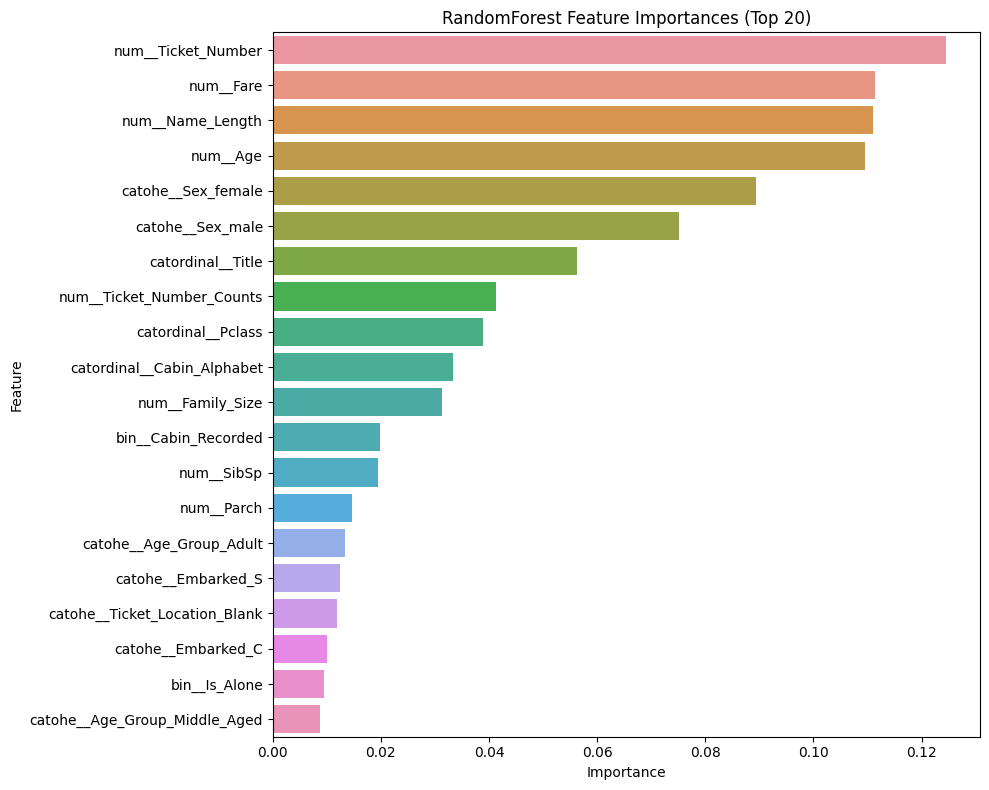

Feature importance plot for RandomForest saved as RandomForest_feature_importances.png


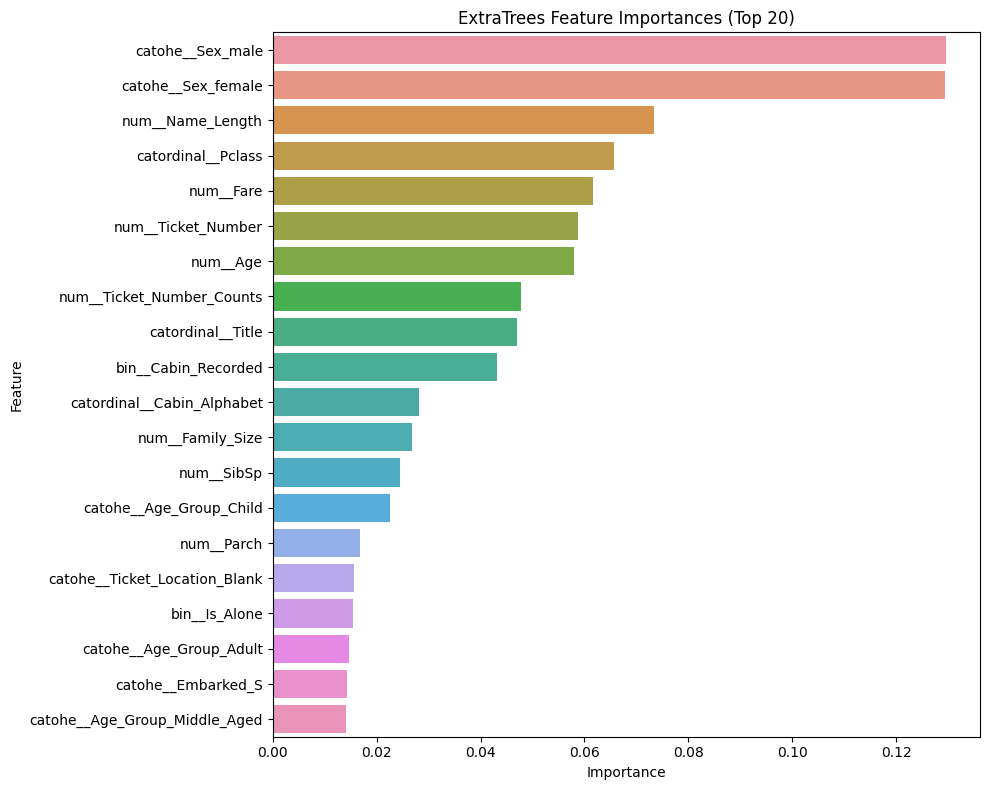

Feature importance plot for ExtraTrees saved as ExtraTrees_feature_importances.png


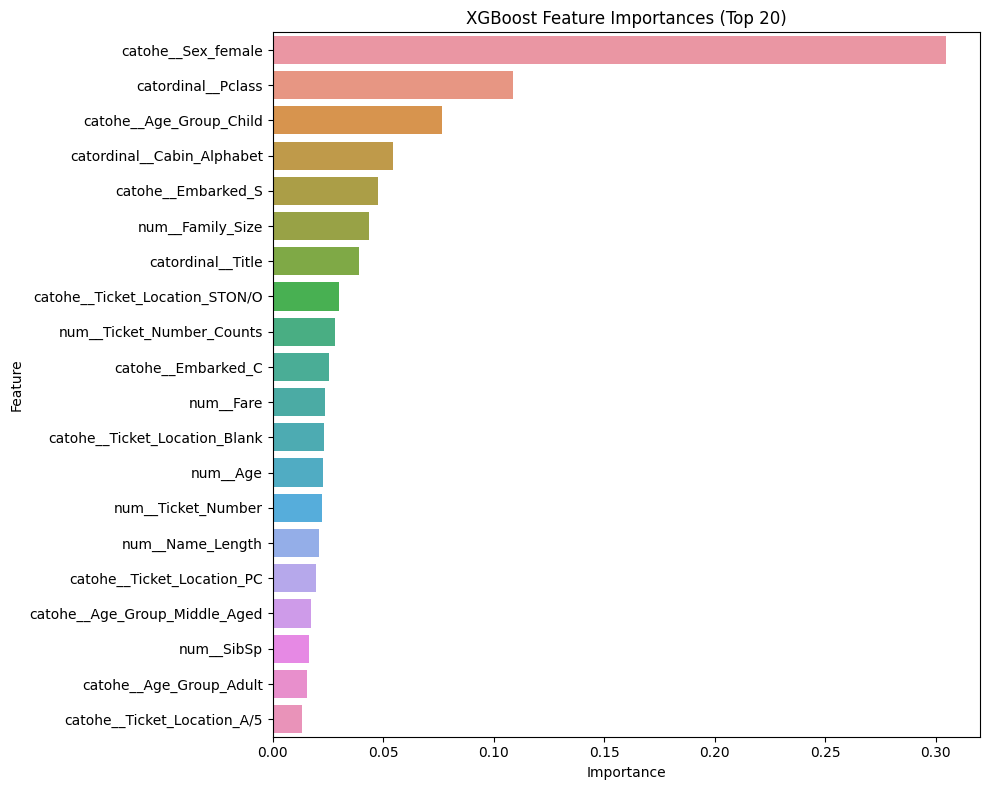

Feature importance plot for XGBoost saved as XGBoost_feature_importances.png


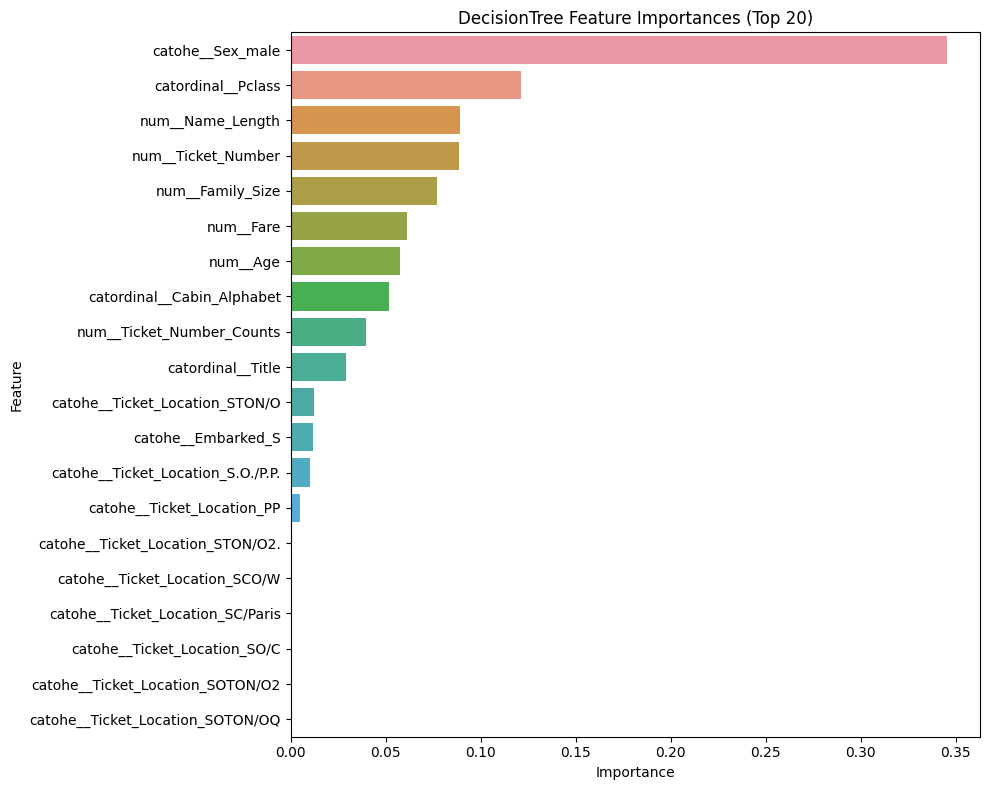

Feature importance plot for DecisionTree saved as DecisionTree_feature_importances.png
LogisticRegression does not have feature_importances_
GaussianNB does not have feature_importances_
KNN does not have feature_importances_


In [14]:
def plot_feature_importances(model, model_name, top_n=20):
    # Check if model has feature_importances_
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        importances = model.named_steps['classifier'].feature_importances_
        feature_names = model.named_steps['preprocessor'].get_feature_names_out()
        
        # Create dataframe for importances
        feat_importances = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })
        
        # Sort features by importance and take the top_n
        feat_importances = feat_importances.sort_values(by='Importance', ascending=False).head(top_n)
        
        # Plot
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feat_importances)
        plt.title(f'{model_name} Feature Importances (Top {top_n})')
        plt.tight_layout()

        # Save the plot
        plot_filename = f'{model_name}_feature_importances.png'
        plt.savefig(plot_filename)
        plt.show()
        print(f"Feature importance plot for {model_name} saved as {plot_filename}")
    else:
        print(f"{model_name} does not have feature_importances_")

# Plot and save feature importances for each model
for model_name, model in best_models.items():
    plot_feature_importances(model, model_name, top_n=20)

# Thank you

- Thank you for taking the time to go through this work. 
- Your feedback and suggestions for improving the analysis are highly appreciated. 
- If you found the notebook helpful and informative, **please consider upvoting**. 

In [15]:
shutil.copy(f'submission_{results_df.Model[0]}.csv', 'submission.csv')

'submission.csv'